In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df[df['diabetes'] == 1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [5]:
len(df)

100000

In [6]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

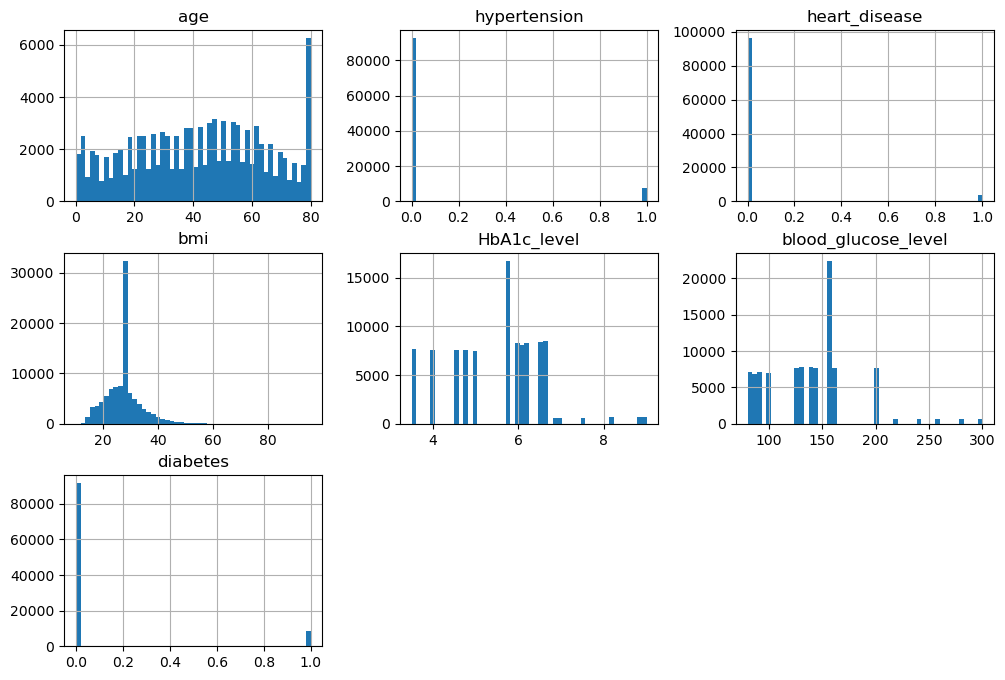

In [7]:
#histogram
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [10]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [11]:
#convert string/objects fileds to numeric via get
df2 = pd.get_dummies(df,columns=['gender','smoking_history'],drop_first=True)
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


In [12]:
#one hot encoder
df_category = df[['gender', 'smoking_history']]
df_category.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [13]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_category_1hot = cat_encoder.fit_transform(df_category)
df_category_1hot.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [14]:
df_category_1hot.shape

(100000, 9)

In [15]:
cat_encoder.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['No Info', 'current', 'ever', 'former', 'never', 'not current'],
       dtype=object)]

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Male                  100000 non-null  uint8  
 8   gender_Other                 100000 non-null  uint8  
 9   smoking_history_current      100000 non-null  uint8  
 10  smoking_history_ever         100000 non-null  uint8  
 11  smoking_history_former       100000 non-null  uint8  
 12  smoking_history_never        100000 non-null  uint8  
 13  

In [17]:
#collect output label
y = df2['diabetes']
y.shape

(100000,)

In [18]:
#drop output label from input data
X = df2.drop('diabetes', axis=1)
X2=X
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0


In [19]:
X2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0


In [20]:
#from sklearn.preprocessing import MinMaxScaler

#min_max_scaler = MinMaxScaler()
#X2[['age','bmi','HbA1c_level','blood_glucose_level']] = min_max_scaler.fit_transform(X2[['age','bmi','HbA1c_level','blood_glucose_level']])
#X2.head()

In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X[['age','bmi','HbA1c_level','blood_glucose_level']] = std_scaler.fit_transform(X[['age','bmi','HbA1c_level','blood_glucose_level']])
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,0,1,-0.321056,1.001706,0.047704,0,0,0,0,0,1,0
1,0.538006,0,0,-0.000116,1.001706,-1.426210,0,0,0,0,0,0,0
2,-0.616691,0,0,-0.000116,0.161108,0.489878,1,0,0,0,0,1,0
3,-0.261399,0,0,-0.583232,-0.492690,0.416183,0,0,1,0,0,0,0
4,1.515058,1,1,-1.081970,-0.679490,0.416183,1,0,1,0,0,0,0


In [22]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,0,1,-0.321056,1.001706,0.047704,0,0,0,0,0,1,0
1,0.538006,0,0,-0.000116,1.001706,-1.426210,0,0,0,0,0,0,0
2,-0.616691,0,0,-0.000116,0.161108,0.489878,1,0,0,0,0,1,0
3,-0.261399,0,0,-0.583232,-0.492690,0.416183,0,0,1,0,0,0,0
4,1.515058,1,1,-1.081970,-0.679490,0.416183,1,0,1,0,0,0,0


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [24]:
#split test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 13)
(20000, 13)
(80000,)
(20000,)


In [26]:
from sklearn.linear_model import SGDClassifier

sgd_classifer = SGDClassifier(random_state=42)
sgd_classifer.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [27]:
output = sgd_classifer.predict(X_test)

In [28]:
#measure accuracy
contains_one = np.any(output == 1)
contains_one

True

In [29]:
index_of_one = np.where(output == 1)[0][0]
index_of_one

5

In [30]:
output[0:50]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [31]:
y_test.head(10)

75721    0
80184    0
19864    0
76699    0
92991    1
76434    0
84004    0
80917    0
60767    0
50074    0
Name: diabetes, dtype: int64

In [32]:
### performance measure via cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifer, X_train, y_train, cv=3, scoring="accuracy")

array([0.95946301, 0.96265047, 0.95923648])

In [33]:
### performance measure via confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_classifer, X_train, y_train, cv=3)

In [34]:
### confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[72777,   431],
       [ 2733,  4059]])

In [35]:
### precision from confusion matrix
precision = cm[1,1]/(cm[1,1]+cm[0,1])
precision

0.9040089086859688

In [36]:
### recall from confusion matrix
recall = cm[1,1]/(cm[1,1]+cm[1,0])
recall

0.5976148409893993

In [37]:
#precision and recall
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_train_predict))
print(recall_score(y_train, y_train_predict))

0.9040089086859688
0.5976148409893993


In [38]:
### precision score
y_train_score = cross_val_predict(sgd_classifer, X_train, y_train, cv=3, method="decision_function")
y_train_score

array([-5.93484656, -1.79362941, -4.43721639, ..., -3.34426608,
       -1.79918852, -3.14486677])

In [39]:
### decision tree classifer
from sklearn.tree import DecisionTreeClassifier

decision_tree_cls = DecisionTreeClassifier()
decision_tree_cls.fit(X_train, y_train);
decision_tree_cls.score(X_test, y_test)

0.9518

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier

classifiers = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreeClassifier": BaggingClassifier(ExtraTreeClassifier()),
    "ExtraTreesClassifier": ExtraTreesClassifier(n_estimators=100, random_state=0),
    "KNeighborsClassifier3": KNeighborsClassifier(n_neighbors=3),
    #"MLPClassifier": MLPClassifier(),
    "RadiusNeighborsClassifier": RadiusNeighborsClassifier(radius=50.0),
    "RandomForestClassifier2": RandomForestClassifier(max_depth=2, random_state=0),
    "RidgeClassifier": RidgeClassifier(),
    "RidgeClassifierCV": RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    "BernoulliNB": BernoulliNB(force_alpha=True),
    "GaussianNB":GaussianNB(),
    #"LabelPropagation":LabelPropagation(),
    #"LabelSpreading":LabelSpreading(),
    "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis(),
    "LinearSVC":make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5)),
    "LogisticRegression": LogisticRegression(random_state=0),
    "LogisticRegressionCV":LogisticRegressionCV(cv=5, random_state=0),
    "NearestCentroid": NearestCentroid(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RadiusNeighborsClassifier":RadiusNeighborsClassifier(radius=1.0),
    "NuSVC":make_pipeline(StandardScaler(), NuSVC()),
    "SVC": make_pipeline(StandardScaler(), SVC(gamma='auto')),
    #"GaussianProcessClassifier":GaussianProcessClassifier(kernel=1.0 * RBF(1.0)),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    #"GaussianProcessClassifier": GaussianProcessClassifier(kernel=1.0 * RBF(1.0)),
    "SGDClassifier": make_pipeline(StandardScaler(),SGDClassifier(tol=1e-3)),
    "Perceptron":  Perceptron(tol=1e-3, random_state=0),
    "PassiveAgressiveClassifier":  PassiveAggressiveClassifier(random_state=0,tol=1e-3),
    #"GaussianProcess1v1": GaussianProcessClassifier(kernel=1.0 * RBF(1.0), multi_class = "one_vs_one", random_state=0),
    
}

scorenames={}

for name, clf in zip(list(classifiers.keys()), list(classifiers.values())):
    print(name, "starting")
    skip = False
    scores = []
    for i in range(3):
        try:
            clf.fit(X_train, y_train)
            scores.append(clf.score(X_test, y_test))
        except:
            skip=True
    if skip == True: continue
    score = 0
    for onescore in scores:
        score += onescore
    score = score / 3
    scorenames[name] = score
    print(name, "finishing")

DecisionTreeClassifier starting
DecisionTreeClassifier finishing
ExtraTreeClassifier starting
ExtraTreeClassifier finishing
ExtraTreesClassifier starting
ExtraTreesClassifier finishing
KNeighborsClassifier3 starting
KNeighborsClassifier3 finishing
RadiusNeighborsClassifier starting
RandomForestClassifier2 starting
RandomForestClassifier2 finishing
RidgeClassifier starting
RidgeClassifier finishing
RidgeClassifierCV starting
RidgeClassifierCV finishing
BernoulliNB starting
BernoulliNB finishing
GaussianNB starting
GaussianNB finishing
LinearDiscriminantAnalysis starting
LinearDiscriminantAnalysis finishing
LinearSVC starting


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC finishing
LogisticRegression starting
LogisticRegression finishing
LogisticRegressionCV starting
LogisticRegressionCV finishing
NearestCentroid starting
NearestCentroid finishing
QuadraticDiscriminantAnalysis starting


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis finishing
NuSVC starting
SVC starting
SVC finishing
GradientBoostingClassifier starting
GradientBoostingClassifier finishing
SGDClassifier starting
SGDClassifier finishing
Perceptron starting
Perceptron finishing
PassiveAgressiveClassifier starting
PassiveAgressiveClassifier finishing


In [41]:
scorenames.values()

dict_values([0.9523666666666667, 0.9661333333333334, 0.9671499999999998, 0.9585, 0.9364, 0.9386, 0.9386, 0.91675, 0.63015, 0.95635, 0.95945, 0.95905, 0.95865, 0.89905, 0.61745, 0.96135, 0.97235, 0.9585833333333333, 0.94325, 0.94575])

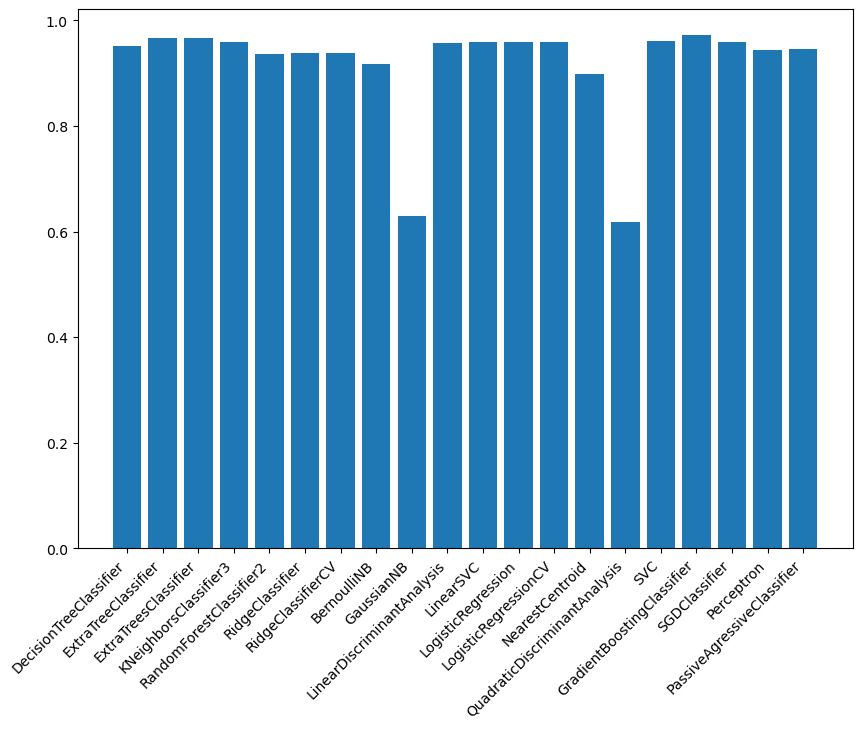

In [42]:
from matplotlib import pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(scorenames.keys(), scorenames.values())
plt.xticks(rotation=45, ha='right')
 
# Show Plot
plt.show()